In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle
%matplotlib inline

In [108]:
def acc_cal(w,train,test):
    j=0;
    for i, row in train.iloc[:].iterrows():
        x=[row['Age'],row['TumorSize'],1]
        y=[row['Class']]
        if j==0:
            X_tr=x
            Y_tr=y
        else:
            X_tr=np.vstack([X_tr, x])
            Y_tr=np.append(Y_tr,y)
        j+=1
    X_tr=np.array(X_tr)
    Y_tr=np.array(Y_tr)
    n=X_tr.shape[0]
    train_acc=0
    for i in range(0,n):
        if Y_tr[i]*(X_tr[i].dot(w))>0:
            train_acc+=1
    train_acc=train_acc/n
    
    j=0;
    for i, row in test.iloc[:].iterrows():
        x=[row['Age'],row['TumorSize'],1]
        y=[row['Class']]
        if j==0:
            X_te=x
            Y_te=y
        else:
            X_te=np.vstack([X_te, x])
            Y_te=np.append(Y_te,y)
        j+=1
    X_te=np.array(X_te)
    Y_te=np.array(Y_te)
    n=X_te.shape[0]
    test_acc=0
    for i in range(0,n):
        if Y_te[i]*(X_te[i].dot(w))>0:
            test_acc+=1
    test_acc=test_acc/n
    return train_acc,test_acc            

# 2b) perceptron algorithm

In [136]:
def perceptron(train,test,a,b):
    for i, row in train.iloc[:].iterrows():
        if row['Class']==1:
            plt.scatter(row['Age'],row['TumorSize'],c=a,marker='+')
        else:
            plt.scatter(row['Age'],row['TumorSize'],c=b,marker='x')
    j=0; 
    for i, row in train.iloc[:].iterrows():
        x=[row['Age'],row['TumorSize'],1] # add 1 column for intercept concern
        y=[row['Class']]
        if j==0:
            X_tr=x
            Y_tr=y
        else:
            X_tr=np.vstack([X_tr, x])
            Y_tr=np.append(Y_tr,y)
        j+=1
    w=np.array([0,0,0]) # w initialization
    X_tr=np.array(X_tr)
    Y_tr=np.array(Y_tr)
    t=0
    k=0
    n=X_tr.shape[0]
    # perceptron algorithm
    while k==0:
        for i in range(0,n):
            if Y_tr[i]*(X_tr[i].dot(w))<=0:
                w=w+(Y_tr[i]*X_tr[i])
                if t==0:
                    train_acc,test_acc=acc_cal(w,train,test) # calculate accuracy on train set and test set
                else:
                    if t%200==0: # take accuracy value every 200 iteration samples 
                        tr_a,te_a=acc_cal(w,train,test)
                        train_acc=np.append(train_acc,tr_a)
                        test_acc=np.append(test_acc,te_a)
                t+=1;
                break;
            else:
                if i==n-1:
                    k+=1;
    print("w= {} ".format(w))
    x = np.linspace(33, 75, 200)
    y=-w[0]*x/w[1]-w[2]/w[1]
    plt.plot(x, y)
    return t,train_acc,test_acc;

# 2a) & c)

w= [ -284    78 11209] 


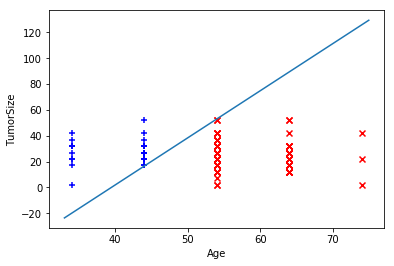

In [154]:
df = pd.read_csv('breast-cancer_cleaned.csv')
df=shuffle(df)
for i, row in df.iloc[:].iterrows():
    temp=row['TumorSize'].split('-', 1 );
    row['TumorSize']=int((int(temp[0])+int(temp[1]))/2)
    temp=row['Age'].split('-', 1 );
    row['Age']=int((int(temp[0])+int(temp[1]))/2)
    if row['Class'] == 'recurrence-events':
        row['Class']=1;
    else:
        row['Class']=-1;    

train,test = train_test_split(df, test_size=.3)

plt.xlabel('Age')
plt.ylabel('TumorSize')
num_1,train_acc_1,test_acc_1=perceptron(train,test,'b','r')

#train=shuffle(train)
#num_2,train_acc_2,test_acc_2=perceptron(train,test,'r','b')

# 2d)

w= [ -284    78 11209] 
w= [-194   48 7854] 


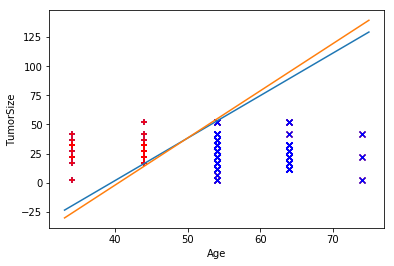

In [155]:
plt.xlabel('Age')
plt.ylabel('TumorSize')
num_1,train_acc_1,test_acc_1=perceptron(train,test,'b','r')

train=shuffle(train)
num_2,train_acc_2,test_acc_2=perceptron(train,test,'r','b')

# 2e)

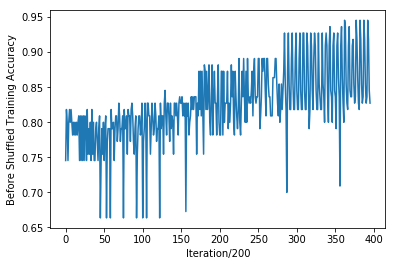

Iteration times = 79165 


In [156]:
plt.xlabel('Iteration/200')
plt.ylabel('Before Shuffled Training Accuracy')
plt.plot(train_acc_1)
plt.show()
print("Iteration times = {} ".format(num_1))

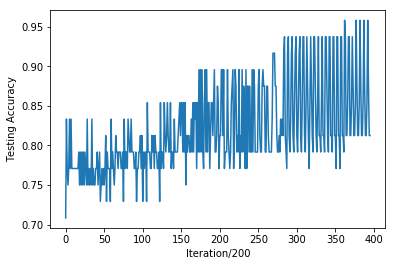

In [157]:
plt.xlabel('Iteration/200')
plt.ylabel('Testing Accuracy')
plt.plot(test_acc_1)
plt.show()

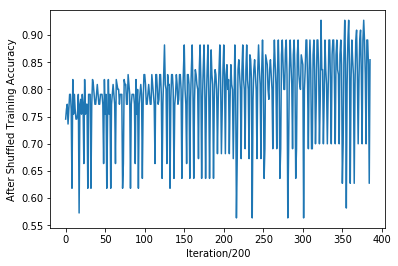

Iteration times = 77008 


In [158]:
plt.xlabel('Iteration/200')
plt.ylabel('After Shuffled Training Accuracy')
plt.plot(train_acc_2)
plt.show()
print("Iteration times = {} ".format(num_2))

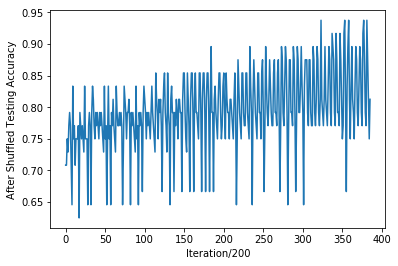

In [159]:
plt.xlabel('Iteration/200')
plt.ylabel('After Shuffled Testing Accuracy')
plt.plot(test_acc_2)
plt.show()